In [2]:
# Importing TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# For this project we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.
# This dataset includes 60,000 images for training and 10,000 images for validation/testing.

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 33s 7us/step


In [4]:
# we've got 60,000 images that are made up of 28x28 pixels (784 in total).
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]  #  a single pixel's value

194

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_labels[:10]  # first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

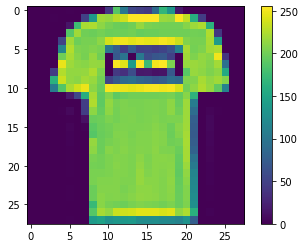

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Scaling our model to have value between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [12]:
#Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) 
#to denote that our input should come in in that shape. 
#The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons 
#so that each pixel will be associated with one neuron.

#Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected 
#and each neuron from the previous layer connects to each neuron of this layer. 
#It has 128 neurons and uses the rectify linear unit activation function.

#Layer 3: This is our output later and is also a dense layer. 
#It has 10 neurons that we will look at to determine our models output. 
#Each neuron represnts the probabillity of a given image being one of the 10 different classes. 
#The activation function softmax is used on this layer to calculate a probabillity distribution for each class. 
#This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of 
#the image being that class.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)  

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5030 - accuracy: 0.8215
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3767 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3152 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2815 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2692 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8818
Test accuracy: 0.8817999958992004


In [18]:
# To make predictions we simply need to pass an array of data in the form we've specified in the input layer 
# to .predict() method.

In [19]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [20]:
predictions[0]

array([2.4869556e-07, 1.8757025e-11, 3.0899885e-10, 6.5453212e-11,
       2.3324456e-10, 3.2141991e-04, 3.3598036e-07, 4.1820253e-03,
       1.4060125e-08, 9.9549603e-01], dtype=float32)

In [23]:
# we can check if this is correct by looking at the value of the cooresponding test label

In [22]:
test_labels[0]

9

Pick a number: 24
1/1 [==============================] - 0s 45ms/step


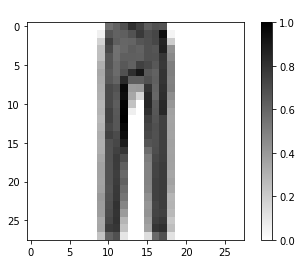

In [24]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


## Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.